In [226]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib import cm

In [227]:
cmd_pose_trajs = torch.load('/home/yunkao/git/IsaacLabExtensionTemplate/source/spinal_surgery/spinal_surgery/recordings/robot_US_guidance/PPO/cmd_pose_trajs.pt')
# (N, T, 3)
print(cmd_pose_trajs.shape)
goal_cmd_pose = torch.load('/home/yunkao/git/IsaacLabExtensionTemplate/source/spinal_surgery/spinal_surgery/recordings/robot_US_guidance/PPO/goal_cmd_pose.pt')
print(goal_cmd_pose.shape)

torch.Size([100, 420, 3])
torch.Size([100, 3])


In [228]:
def plot_colored_by_x(x, y, ax, cmap="viridis", linewidth=2, alpha=0.5):
    """
    Plots a 2D line with color based on x values.

    Parameters:
    - x, y: 1D arrays of equal length.
    - cmap: Matplotlib colormap name.
    - linewidth: Width of the line segments.
    - colorbar_label: Label for the colorbar.
    - title: Plot title.
    """

    if len(x) != len(y):
        raise ValueError("x and y must have the same length.")

    # Create segments
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)

    # Normalize and map colors based on x
    time_step = -np.log(np.linspace(0, 1, len(x))) / 5
    colors = cm.get_cmap(cmap)(time_step)

    # Create and add LineCollection
    lc = LineCollection(segments, colors=colors, linewidth=linewidth, alpha=alpha)

    ax.add_collection(lc)
    

/tmp/ipykernel_6530/2508749242.py:21: RuntimeWarning: divide by zero encountered in log
  time_step = -np.log(np.linspace(0, 1, len(x))) / 5
/tmp/ipykernel_6530/2508749242.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap(cmap)(time_step)


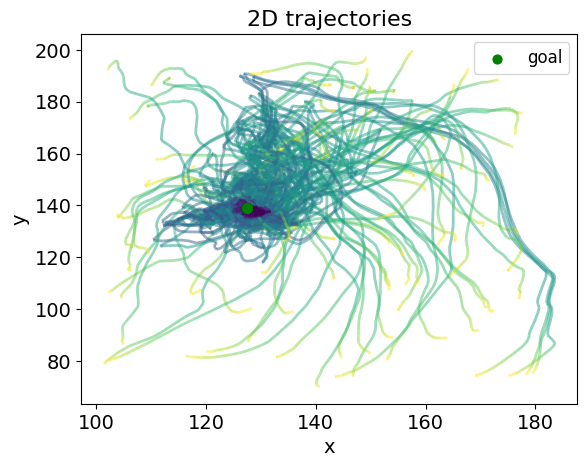

In [229]:

cmd_pose_trajs = cmd_pose_trajs.cpu().numpy()
goal_cmd_pose = goal_cmd_pose.cpu().numpy()

PPO_ave_pos_distance = np.mean(np.linalg.norm(cmd_pose_trajs[:, :, :2] - goal_cmd_pose[:, :2].reshape((-1, 1, 2)), axis=-1), axis=0)
PPO_ave_angle_distance = np.mean(abs(cmd_pose_trajs[:, :, 2] - goal_cmd_pose[:, 2].reshape((-1, 1))), axis=0)

fig, ax = plt.subplots()
for traj in range(cmd_pose_trajs.shape[0]):
    plot_colored_by_x(cmd_pose_trajs[traj, :, 0], cmd_pose_trajs[traj, :, 1], ax)
    # plt.plot(cmd_pose_trajs[traj, :, 0], cmd_pose_trajs[traj, :, 1], c='cornflowerblue', linewidth=2.5, alpha=0.3, label='cmd_pose_traj' if traj == 0 else "")
    
ax.autoscale()
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title('2D trajectories')


plt.scatter(goal_cmd_pose[:, 0], goal_cmd_pose[:, 1], c='green', s=40, label='goal', zorder=2)
plt.legend()
plt.show()

torch.Size([100, 420, 3])
torch.Size([100, 3])


/tmp/ipykernel_6530/2508749242.py:21: RuntimeWarning: divide by zero encountered in log
  time_step = -np.log(np.linspace(0, 1, len(x))) / 5
/tmp/ipykernel_6530/2508749242.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap(cmap)(time_step)


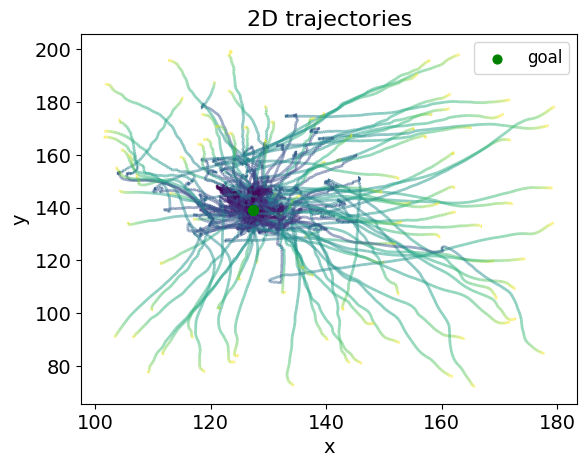

In [230]:
cmd_pose_trajs = torch.load('/home/yunkao/git/IsaacLabExtensionTemplate/source/spinal_surgery/spinal_surgery/recordings/robot_US_guidance/ACT/cmd_pose_trajs.pt')
# (N, T, 3)
print(cmd_pose_trajs.shape)
goal_cmd_pose = torch.load('/home/yunkao/git/IsaacLabExtensionTemplate/source/spinal_surgery/spinal_surgery/recordings/robot_US_guidance/ACT/goal_cmd_pose.pt')
print(goal_cmd_pose.shape)


cmd_pose_trajs = cmd_pose_trajs.cpu().numpy()
goal_cmd_pose = goal_cmd_pose.cpu().numpy()

ACT_ave_pos_distance = np.mean(np.linalg.norm(cmd_pose_trajs[:, :, :2] - goal_cmd_pose[:, :2].reshape((-1, 1, 2)), axis=-1), axis=0)
ACT_ave_angle_distance = np.mean(abs(cmd_pose_trajs[:, :, 2] - goal_cmd_pose[:, 2].reshape((-1, 1))), axis=0)


fig, ax = plt.subplots()
for traj in range(cmd_pose_trajs.shape[0]):
    plot_colored_by_x(cmd_pose_trajs[traj, :, 0], cmd_pose_trajs[traj, :, 1], ax)
    # plt.plot(cmd_pose_trajs[traj, :, 0], cmd_pose_trajs[traj, :, 1], c='cornflowerblue', linewidth=2.5, alpha=0.3, label='cmd_pose_traj' if traj == 0 else "")
    
ax.autoscale()
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title('2D trajectories')


plt.scatter(goal_cmd_pose[:, 0], goal_cmd_pose[:, 1], c='green', s=40, label='goal', zorder=2)
plt.legend()
plt.show()

torch.Size([100, 420, 3])
torch.Size([100, 3])


/tmp/ipykernel_6530/2508749242.py:21: RuntimeWarning: divide by zero encountered in log
  time_step = -np.log(np.linspace(0, 1, len(x))) / 5
/tmp/ipykernel_6530/2508749242.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap(cmap)(time_step)


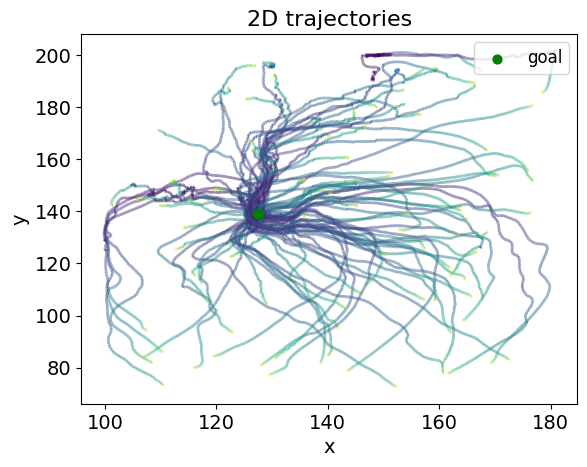

In [231]:
cmd_pose_trajs = torch.load('/home/yunkao/git/IsaacLabExtensionTemplate/source/spinal_surgery/spinal_surgery/recordings/robot_US_guidance/Diffusion/cmd_pose_trajs.pt')
# (N, T, 3)
print(cmd_pose_trajs.shape)
goal_cmd_pose = torch.load('/home/yunkao/git/IsaacLabExtensionTemplate/source/spinal_surgery/spinal_surgery/recordings/robot_US_guidance/Diffusion/goal_cmd_pose.pt')
print(goal_cmd_pose.shape)

cmd_pose_trajs = cmd_pose_trajs.cpu().numpy()
goal_cmd_pose = goal_cmd_pose.cpu().numpy()

diff_ave_pos_distance = np.mean(np.linalg.norm(cmd_pose_trajs[:, :, :2] - goal_cmd_pose[:, :2].reshape((-1, 1, 2)), axis=-1), axis=0)
diff_ave_angle_distance = np.mean(abs(cmd_pose_trajs[:, :, 2] - goal_cmd_pose[:, 2].reshape((-1, 1))), axis=0)


fig, ax = plt.subplots()
for traj in range(cmd_pose_trajs.shape[0]):
    plot_colored_by_x(cmd_pose_trajs[traj, :, 0], cmd_pose_trajs[traj, :, 1], ax)
    # plt.plot(cmd_pose_trajs[traj, :, 0], cmd_pose_trajs[traj, :, 1], c='cornflowerblue', linewidth=2.5, alpha=0.3, label='cmd_pose_traj' if traj == 0 else "")
    
ax.autoscale()
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title('2D trajectories')


plt.scatter(goal_cmd_pose[:, 0], goal_cmd_pose[:, 1], c='green', s=40, label='goal', zorder=2)
plt.legend()
plt.show()

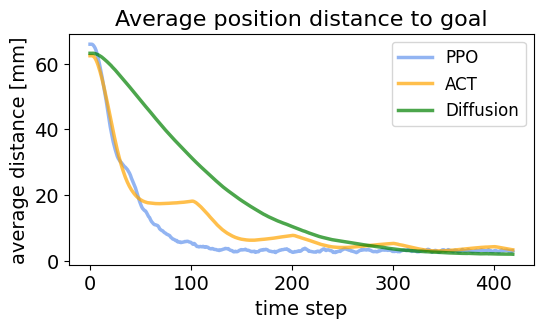

In [236]:
plt.rcParams.update({
    "font.size": 14,          # Base font size
    "axes.titlesize": 16,     # Title size
    "axes.labelsize": 14,     # X/Y label size
    "xtick.labelsize": 14,    # Tick label size
    "ytick.labelsize": 14,
    "legend.fontsize": 12,    # Legend text size
    "figure.titlesize": 18    # Figure title (if used)
})

fig, ax = plt.subplots()
fig.set_size_inches(6, 3)
ax.plot(PPO_ave_pos_distance * 1.5, label='PPO', color='cornflowerblue', linewidth=2.5, alpha=0.7)
ax.plot(ACT_ave_pos_distance * 1.5, label='ACT', color='orange', linewidth=2.5, alpha=0.7)
ax.plot(diff_ave_pos_distance * 1.5, label='Diffusion', color='green', linewidth=2.5, alpha=0.7)
ax.set_xlabel("time step")
ax.set_ylabel("average distance [mm]")
ax.set_title('Average position distance to goal')
ax.legend()
plt.show()

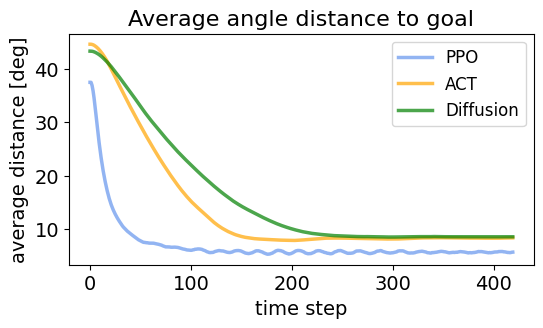

In [237]:
fig, ax = plt.subplots()
fig.set_size_inches(6, 3)
ax.plot(PPO_ave_angle_distance * 180 / np.pi, label='PPO', color='cornflowerblue', linewidth=2.5, alpha=0.7)
ax.plot(ACT_ave_angle_distance * 180 / np.pi, label='ACT', color='orange', linewidth=2.5, alpha=0.7)
ax.plot(diff_ave_angle_distance * 180 / np.pi, label='Diffusion', color='green', linewidth=2.5, alpha=0.7)
ax.set_xlabel("time step")
ax.set_ylabel("average distance [deg]")
ax.set_title('Average angle distance to goal')
ax.legend()
plt.show()